In [21]:
import os
import re
import sys

from PIL import Image, ImageFilter
import imageio
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from scipy import ndimage as ndi
from skimage import feature


filename = './video/dota2ti_v83196893_720p30.mp4'

# Get video id
video_id = re.findall('v\d+', filename)[0]

# Open file handle
vid = imageio.get_reader(filename, 'ffmpeg')

# Get metadata
meta = vid.get_meta_data()
fps = int(meta['fps'])
nframes = meta['nframes']
frames = np.arange(0, int(nframes), 1)

# Close video
vid.close()

values = [0] * len(frames)
table = [frames.tolist(), values]
table = [list(x) for x in zip(*table)]
df = pd.DataFrame(values)
df.columns = ['game_toggle']

timecodes = pd.read_csv('timecodes-all.csv', names=['start', 'stop']).apply(lambda x: x/fps)
timecodes = timecodes.astype(int)

for i in timecodes.index:
    row = timecodes.iloc[i][['start', 'stop']]
    start = int(row[0])
    stop = int(row[1])
    df.loc[np.arange(start, stop, fps).tolist()] = 1

df.reset_index(drop=True)

,game_toggle
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [12]:
df['game_toggle'].head()

second
0    0
1    0
2    0
3    0
4    0
Name: game_toggle, dtype: int64

In [23]:
df['game_toggle'].value_counts()

0    1943325
1      14069
Name: game_toggle, dtype: int64

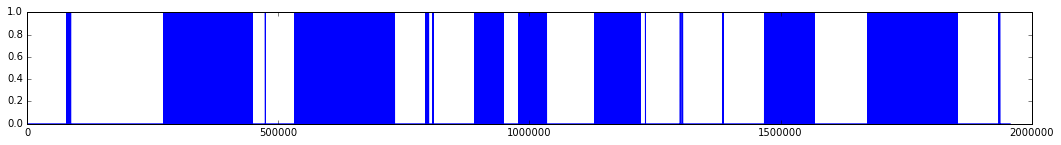

In [28]:
plt.figure(figsize=(18,2))
plt.plot(df.index, df['game_toggle'])